[load_diabetes 회귀 분석]

- 데이터셋 : scikit-learn의 load_diabetes 활용
- 학습방법 : 지도학습 > 회귀 
- 알고리즘 : KNN Regressor

1) 데이터 준비 및 feature/target 분석

In [27]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data,target=load_diabetes(as_frame=True,return_X_y=True)
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [29]:
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [30]:
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


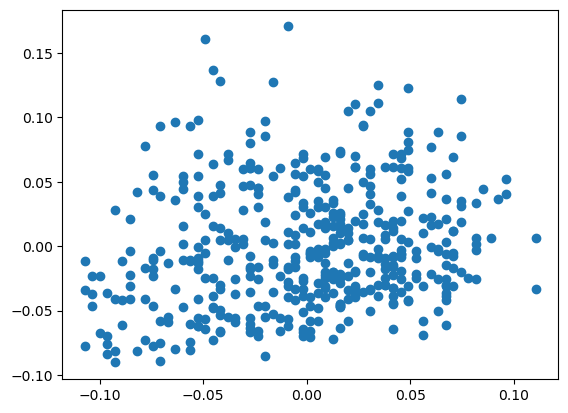

In [31]:
plt.scatter(data.age,data.bmi)

2. feature/target 분리

In [32]:
feature=data[['age','bmi']]

print(f'feature: {feature.shape},{feature.ndim}d')
print(f'target: {target.shape},{target.ndim}d')

feature: (442, 2),2d
target: (442,),1d


3. 데이터셋 준비

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,random_state=8)

In [36]:
print(f'x_train:{x_train.shape},{x_train.ndim}D')
print(f'y_train:{y_train.shape},{y_train.ndim}D')

print(f'x_test:{x_test.shape},{x_test.ndim}D')
print(f'y_test:{y_test.shape},{y_test.ndim}D')

x_train:(331, 2),2D
y_train:(331,),1D
x_test:(111, 2),2D
y_test:(111,),1D


4) 훈련/학습 진행

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
model=KNeighborsRegressor()

In [39]:
model.fit(x_train,y_train)

KNeighborsRegressor()

In [40]:
model.score(x_test,y_test)

0.11594527503526086

5) 최적의 k 찾기

In [41]:
scores={}

for k in range(1,model.n_samples_fit_+1):
    model.n_neighbors=k
    score=model.score(x_test,y_test)
    scores[k]=score

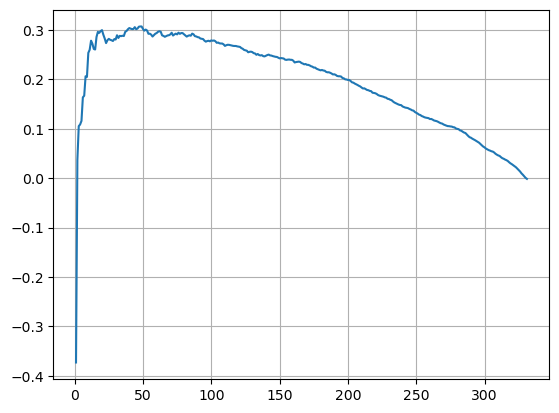

In [42]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.grid()
plt.show()

In [43]:
best_k=sorted(scores.items(),key=lambda x:x[1],reverse=True)[0][0]
best_k

48

6) 훈련/학습 재진행

In [44]:
model.n_neighbors=best_k

In [45]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=48)

In [46]:
model.score(x_test,y_test)

0.3070461767192969

7) 새로운 데이터 예측하기

In [47]:
new_age=input('age')
new_bmi=input('bmi')
df=pd.DataFrame([[new_age,new_bmi]], columns=[['age','bmi']])
df

,age,bmi
0,20,20


In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
mmscaler=MinMaxScaler()

In [50]:
mmscaler.fit(x_train)

MinMaxScaler()

In [51]:
data_scaled=mmscaler.transform(df)
data_scaled

c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[92.25516308, 88.75651654]])

In [52]:
model.predict(data_scaled)

c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([227.95833333])